In [70]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [4]:
data = pd.read_excel(r'D:\downloads\resturant.xlsx')

In [5]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
data.drop(['url','address','phone','reviews_list','menu_item','menu_item','listed_in(city)'], axis=1, inplace=True)

In [8]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,Buffet


In [9]:
len(data.columns)

11

In [10]:
data.shape

(51717, 11)

In [11]:
data.duplicated().sum()

16608

In [12]:
unique_data = data.drop_duplicates()

In [13]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         31339 non-null  object 
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 3.2+ MB


In [14]:
unique_data['name'][:20]

0                                                 Jalsa
1                                        Spice Elephant
2                                       San Churro Cafe
3                                 Addhuri Udupi Bhojana
4                                         Grand Village
5                                       Timepass Dinner
6       Rosewood International Hotel - Bar & Restaurant
7                                                Onesta
8                                        Penthouse Cafe
9                                             Smacznego
10    CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...
11                                         Cafe Shuffle
12                                     The Coffee Shack
13                                           Caf-Eleven
14                                      San Churro Cafe
15                                        Cafe Vivacity
16                                         Catch-up-ino
17                                     Kirthi's 

In [15]:
unique_data['name'][10]

'CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley'

In [16]:
def clean_names(name):
    if isinstance(name, str):
        if(re.findall(r'[a-zA-Z0-9 ]', name)):
            list_name = re.findall(r'[a-zA-Z0-9 ]', name)
        str_name = ''.join(list_name)
        return str_name
    else:
        return name

In [17]:
unique_data['name'] = unique_data['name'].apply(clean_names)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\4230693090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['name'] = unique_data['name'].apply(clean_names)


In [18]:
unique_data['name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: name, Length: 35109, dtype: object

In [19]:
def clean_rates(rate):
    final_rate = ''
    if(rate == 'NEW' or rate == '-'):
        final_rate = np.nan
    else:
        float_rate = float(str(rate).split('/')[0])
        final_rate = float_rate
    return final_rate

In [20]:
unique_data['rate'] = unique_data['rate'].apply(clean_rates)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\1718061116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['rate'] = unique_data['rate'].apply(clean_rates)


In [21]:
unique_data['rate'] = round(unique_data['rate'].fillna(unique_data.groupby('rest_type')['rate'].transform('mean')),1)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\852374539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['rate'] = round(unique_data['rate'].fillna(unique_data.groupby('rest_type')['rate'].transform('mean')),1)


In [22]:
unique_data['rate'] = round(unique_data['rate'].fillna(unique_data['rate'].mean()),1)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\2024278691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['rate'] = round(unique_data['rate'].fillna(unique_data['rate'].mean()),1)


In [23]:
unique_data['rate'].isna().value_counts()

rate
False    35109
Name: count, dtype: int64

In [24]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35095 non-null  object 
 6   rest_type                    34953 non-null  object 
 7   dish_liked                   18102 non-null  object 
 8   cuisines                     35076 non-null  object 
 9   approx_cost(for two people)  34888 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [25]:
unique_data['location'].fillna('No Info',inplace=True)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\3128876968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['location'].fillna('No Info',inplace=True)


In [26]:
unique_data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'No Info', 'CV Raman Nagar', 'Electronic City',
       'HSR', 'Marathahalli', 'Sarjapur Road', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Koramangala 8th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Jalahalli',
       'Koramangala 4th Block', 'Bellandur', 'Whitefield',
       'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipu

In [27]:
unique_data['rest_type'].fillna('No Info',inplace=True)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\2312187628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['rest_type'].fillna('No Info',inplace=True)


In [28]:
unique_data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'No Info', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',


In [29]:
unique_data['dish_liked'].fillna('No Info',inplace=True)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\3432292688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['dish_liked'].fillna('No Info',inplace=True)


In [30]:
unique_data['dish_liked'].unique()

array(['Pasta, Lunch Buffet, Masala Papad, Paneer Lajawab, Tomato Shorba, Dum Biryani, Sweet Corn Soup',
       'Momos, Lunch Buffet, Chocolate Nirvana, Thai Green Curry, Paneer Tikka, Dum Biryani, Chicken Biryani',
       'Churros, Cannelloni, Minestrone Soup, Hot Chocolate, Pink Sauce Pasta, Salsa, Veg Supreme Pizza',
       ...,
       'Noodles, Chicken Noodle, Momos, American Chopsuey, Salad, Manchow Soup, Manchurian',
       'Chicken Quesadilla, Naan, Breakfast Buffet, Cheesecake, Cocktails, Lunch Buffet, Biryani',
       'Biryani, Andhra Meal'], dtype=object)

In [31]:
unique_data['cuisines'].fillna('No Info',inplace=True)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\4027520374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['cuisines'].fillna('No Info',inplace=True)


In [32]:
unique_data['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [33]:
unique_data['approx_cost(for two people)'] = round(unique_data['approx_cost(for two people)'].fillna(unique_data.groupby('rest_type')['approx_cost(for two people)'].transform('mean')),1)

C:\Users\Devang\AppData\Local\Temp\ipykernel_10360\51490579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_data['approx_cost(for two people)'] = round(unique_data['approx_cost(for two people)'].fillna(unique_data.groupby('rest_type')['approx_cost(for two people)'].transform('mean')),1)


In [34]:
unique_data['approx_cost(for two people)'].unique()

array([ 800. ,  300. ,  600. ,  700. ,  550. ,  500. ,  450. ,  650. ,
        400. ,  900. ,  200. ,  750. ,  150. ,  850. ,  100. , 1200. ,
        350. ,  250. ,  950. , 1000. , 1500. , 1300. ,  199. ,   80. ,
       1100. ,  160. , 1600. ,  230. ,  130. ,   50. ,  190. , 1700. ,
        438.6,  442.1,  322.4, 1400. ,  180. , 1350. , 2200. , 2000. ,
       1800. , 1261.9, 1900. ,  307.9,  389.3,  330. , 2500. , 2100. ,
       3000. , 2800. , 3400. ,   40. ,  801.5, 1250. , 3500. , 4000. ,
       2400. , 2600. ,  120. , 1450. ,  633.8,  469. ,  337.2,   70. ,
        276. , 1266.5, 3200. ,   60. ,  560. ,  444.6, 1383. ,  240. ,
        360. , 6000. , 1050. ,  271.4, 1508.5, 2300. , 4100. ,  910.2,
       5000. , 3700. , 1650. , 2700. , 4500. ,  395.4,  140. ])

In [35]:
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35109 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35109 non-null  object 
 1   online_order                 35109 non-null  object 
 2   book_table                   35109 non-null  object 
 3   rate                         35109 non-null  float64
 4   votes                        35109 non-null  int64  
 5   location                     35109 non-null  object 
 6   rest_type                    35109 non-null  object 
 7   dish_liked                   35109 non-null  object 
 8   cuisines                     35109 non-null  object 
 9   approx_cost(for two people)  35109 non-null  float64
 10  listed_in(type)              35109 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB


In [36]:
unique_data.sort_values(by='votes',ascending=False).head(10)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
49170,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery
50059,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife
49627,Byg Brewski Brewing Company,Yes,Yes,4.9,16832,Sarjapur Road,Microbrewery,"Cocktails, Butter Chicken, Dahi Kebab, Rajma C...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out
4944,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Drinks & nightlife
4801,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Dine-out
3921,Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,Delivery
19268,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Beer, Pesto Pizza, Nachos, Cocktails, Beef Las...","Italian, American, Pizza",1500.0,Drinks & nightlife
18643,Toit,No,No,4.7,14956,Indiranagar,Microbrewery,"Beer, Pesto Pizza, Nachos, Cocktails, Beef Las...","Italian, American, Pizza",1500.0,Dine-out
36668,Truffles,No,No,4.7,14726,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900.0,Dine-out
34779,Truffles,No,No,4.7,14723,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900.0,Cafes


**Top 10 most popular restraunt by votes**

**INSIGHTS: Most popular restraunt gives us an idea about the most trusted restraunts by people in the city and it will help food shows and bloggers to make content**

In [37]:
unique_data.groupby('name')[['votes']].mean().sort_values(by='votes',ascending=False).head(10)

,votes
name,
Byg Brewski Brewing Company,16588.500000
Toit,14956.000000
The Black Pearl,9562.333333
Big Pitcher,9164.500000
Arbor Brewing Company,8396.545455
Prost Brew Pub,7861.666667
Church Street Social,7561.727273
Hoot,7257.000000
Truffles,7139.952381


**Top 10 most rated restraunt**

**INSIGHTS: It shows the most liked restraunt in the city and gives us insights about the customer treatment, food quality, taste and pricing is satisfactory**

In [38]:
unique_data.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False).head(10)

,rate
name,
Sant Spa Cuisine,4.900000
Asia Kitchen By Mainland China,4.900000
Byg Brewski Brewing Company,4.900000
Punjab Grill,4.871429
Belgian Waffle Factory,4.852381
OG Variar Sons,4.800000
Flechazo,4.800000
The Pizza Bakery,4.800000
Barbecue by Punjab Grill,4.750000


**Top 10 most expensive restraunt**

**INSIGHTS: It shows the pricing for the people who wants to experience luxury ambiance and cuisine in the city**

In [39]:
unique_data.groupby('name')[['approx_cost(for two people)']].mean().sort_values(by='approx_cost(for two people)',ascending=False).head(10)

,approx_cost(for two people)
name,
Le Cirque Signature The Leela Palace,6000.0
Royal Afghan ITC Windsor,5000.0
Malties Radisson Blu,4500.0
La Brasserie Le Meridien,4100.0
Masala Klub The Taj West End,4000.0
Dakshin ITC Windsor,4000.0
Jamavar The Leela Palace,4000.0
Dum Pukht Jolly Nabobs ITC Windsor,4000.0
Alba JW Marriott Bengaluru,4000.0


**Top 10 cheapest restraunt**

**If the budget is tight or in case of emergency this list helps. Useful for students and bachelors**

In [40]:
unique_data.groupby('name')[['approx_cost(for two people)']].mean().sort_values(by='approx_cost(for two people)').head(10)

,approx_cost(for two people)
name,
Srinidhi Sagar Deluxe,40.0
Bread Better,50.0
Funky Food,60.0
Namaste,70.0
Nellore Dosa Camp,70.0
Dosa Cafe,80.0
Dtink Lab,80.0
Shree Ganesh Fruit Juice Centre,90.0
Om Meals Paratha Junction,100.0


**No of types of restraunt**

**INSIGHTS: Table shows that people prefer delivery the most and buffets the least**

In [41]:
unique_data.groupby('listed_in(type)').count()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people)
listed_in(type),,,,,,,,,,
Buffet,676,676,676,676,676,676,676,676,676,676
Cafes,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252
Delivery,16220,16220,16220,16220,16220,16220,16220,16220,16220,16220
Desserts,2478,2478,2478,2478,2478,2478,2478,2478,2478,2478
Dine-out,12965,12965,12965,12965,12965,12965,12965,12965,12965,12965
Drinks & nightlife,913,913,913,913,913,913,913,913,913,913
Pubs and bars,605,605,605,605,605,605,605,605,605,605


**Show all cafes in the city**

**INSIGHTS: All the cafes present in the city for someone who only wants to search for cafes**

In [42]:
all_cafes_data = unique_data[unique_data['listed_in(type)'] == 'Cafes']
all_cafes_data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
7,Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,Cafes
8,Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,Cafes
9,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes
10,Caf Down The Alley,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,Cafes
11,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Mocktails, Peri Fries, Lasagne, Pizza, Chicken...","Cafe, Italian, Continental",600.0,Cafes
...,...,...,...,...,...,...,...,...,...,...,...
50129,Cuppa,No,No,3.3,5,Whitefield,Cafe,No Info,"Fast Food, Street Food, Beverages",400.0,Cafes
50130,Beaten Coffee,No,No,3.5,0,Whitefield,Food Court,No Info,"Chinese, Cafe",200.0,Cafes
50131,The Coffee Bean Tea Leaf,Yes,No,3.0,38,Whitefield,Cafe,No Info,"Cafe, Coffee",700.0,Cafes
50132,Cafe Thulp,Yes,No,3.6,57,"ITPL Main Road, Whitefield",Cafe,"Burgers, Pasta Alfredo, Pulled Pork Burger, Pizza","Cafe, Burger, Italian, Salad",1000.0,Cafes


**Top 10 highly rated cafes**

**INSIGHTS: Most liked cafes in the city and it gives us insights about the customer treatment, food quality, taste and pricing is satisfactory**

In [43]:
all_cafes_data.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False).head(10)

,rate
name,
Hammered,4.657143
Lot Like Crepes,4.633333
The Hole in the Wall Cafe,4.600000
The Blue Wagon Kitchen,4.600000
Here Now,4.600000
Truffles,4.600000
Bloomsburys Global Kitchen Bakehouse,4.500000
Avista Cafe Pizzeria,4.500000
99 Pancakes,4.500000


**Top 10 most popular cafes**

**INSIGHTS: It gives us an idea about the most trusted cafes by people in the city and it will help food shows and bloggers to make content**

In [44]:
all_cafes_data.groupby('name')[['votes']].mean().sort_values(by='votes',ascending=False).head(10)

,votes
name,
Truffles,7524.615385
The Hole in the Wall Cafe,7122.750000
Hammered,4488.142857
Onesta,4059.421053
Dyu Art Cafe,3841.000000
A Hole Lotta Love Cafe,2868.000000
Green Theory,2847.750000
Om Made Cafe,2732.600000
Mr Beans Home Cafe,2712.333333


In [45]:
all_desserts_data = unique_data[unique_data['listed_in(type)'] == 'Desserts']
all_desserts_data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
494,Corner House Ice Cream,No,No,4.3,345,Banashankari,Dessert Parlor,"Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...","Ice Cream, Desserts",400.0,Desserts
495,Poonam Sweets,No,No,4.4,356,Banashankari,Sweet Shop,"Dhokla, Jalebi, Badam Milk, Rabri, Rasgulla, R...",Mithai,150.0,Desserts
496,XO Belgian Waffle,Yes,No,3.7,17,Banashankari,Dessert Parlor,No Info,"Desserts, Beverages",400.0,Desserts
497,Old Mumbai Ice Cream,Yes,No,3.9,38,Banashankari,Dessert Parlor,Friendly Staff,Ice Cream,150.0,Desserts
498,Cake of the Day,No,No,3.7,78,Banashankari,"Bakery, Dessert Parlor",No Info,Bakery,150.0,Desserts
...,...,...,...,...,...,...,...,...,...,...,...
51028,Happy Endings,Yes,No,4.1,180,"ITPL Main Road, Whitefield","Bakery, Dessert Parlor","Brownie, Blueberry Cheesecake, Chocolate Truff...","Bakery, Desserts",300.0,Desserts
51029,Cakesta,Yes,No,4.1,126,"ITPL Main Road, Whitefield",Bakery,"Eggless Cake, Choco Mocha, Choco Almond, Blueb...","Bakery, Desserts",500.0,Desserts
51030,The Deli The Den Bengaluru,Yes,No,3.7,24,"ITPL Main Road, Whitefield",Bakery,No Info,"Bakery, Desserts",600.0,Desserts
51031,Lassi Xpress,No,No,3.4,7,"ITPL Main Road, Whitefield",Beverage Shop,No Info,"Beverages, Sandwich, Desserts",200.0,Desserts


**Top 10 most popular desserts**

In [46]:
all_desserts_data.groupby('name')[['votes']].mean().sort_values(by='votes',ascending=False).head(10)

,votes
name,
Flechazo,7154.000000
Hammered,4750.666667
Truffles,3912.000000
Onesta,3826.777778
Green Theory,2852.000000
Bonsouth,2621.250000
Stoner,1948.111111
Berryd Alive,1902.333333
The Teal Door Cafe,1855.000000


**Top 10 most rated desserts**

In [47]:
all_desserts_data.groupby('name')[['rate']].mean().sort_values(by='rate',ascending=False).head(10)

,rate
name,
Belgian Waffle Factory,4.850000
OG Variar Sons,4.800000
The Pizza Bakery,4.800000
Truffles,4.700000
Flechazo,4.700000
Hammered,4.683333
Milano Ice Cream,4.633333
Kurtoskalacs,4.620000
Lot Like Crepes,4.600000


In [48]:
delivery_data = unique_data[unique_data['listed_in(type)'] == 'Delivery']
delivery_data

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
31,Foodiction,Yes,No,2.8,506,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500.0,Delivery
32,Sweet Truth,Yes,No,3.9,35,Banashankari,Delivery,No Info,"Bakery, Desserts",500.0,Delivery
33,Ovenstory Pizza,Yes,No,3.9,172,Banashankari,Delivery,"Paneer Tikka, Garlic Bread, Thin Crust Pizza, ...",Pizza,750.0,Delivery
34,Faasos,Yes,No,4.2,415,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500.0,Delivery
35,Behrouz Biryani,Yes,No,3.9,230,Banashankari,Delivery,"Raita, Gulab Jamun, Paneer Biryani, Vegetable ...",Biryani,650.0,Delivery
...,...,...,...,...,...,...,...,...,...,...,...
50912,RoadHouse Grill,Yes,No,3.8,99,Whitefield,Quick Bites,"Burgers, Chicken Roll, Rolls, Fries, Wings, Ta...","North Indian, Fast Food, Burger, BBQ",450.0,Delivery
50916,Pans Aroma,Yes,No,3.6,0,Whitefield,Quick Bites,No Info,"Bengali, Biryani, North Indian, Chinese, Fast ...",400.0,Delivery
50918,Dessert Bar,Yes,No,3.9,0,Whitefield,Dessert Parlor,No Info,"Desserts, Fast Food",400.0,Delivery
50921,Meghana Grand,Yes,No,3.5,131,Whitefield,Casual Dining,Chicken Biryani,"Biryani, Andhra",800.0,Delivery


**Since delivery is the most popular option whats the average rating and cost for the same?**

**INSIGHTS: Inspite of being a popular option the delivery brings average rating but is affordable considering the convenience**

In [49]:
most_popular_option = delivery_data.groupby('listed_in(type)')[['rate','approx_cost(for two people)']].mean()
most_popular_option

,rate,approx_cost(for two people)
listed_in(type),,
Delivery,3.670086,490.0064


In [50]:
# sns.boxplot(x = most_popular_option['approx_cost(for two people)'],y = most_popular_option['rate'], data = most_popular_option)

**Show the average votes and cost for online orders availability**

**INSIGHTS: Online orders are slightly more preferred due to their cost-effectiveness, making them the best option for busy individuals.**

In [51]:
average_votes_and_cost =unique_data.groupby('online_order')[['votes','approx_cost(for two people)']].mean()
average_votes_and_cost

,votes,approx_cost(for two people)
online_order,,
No,339.852774,652.257639
Yes,377.371589,554.819879


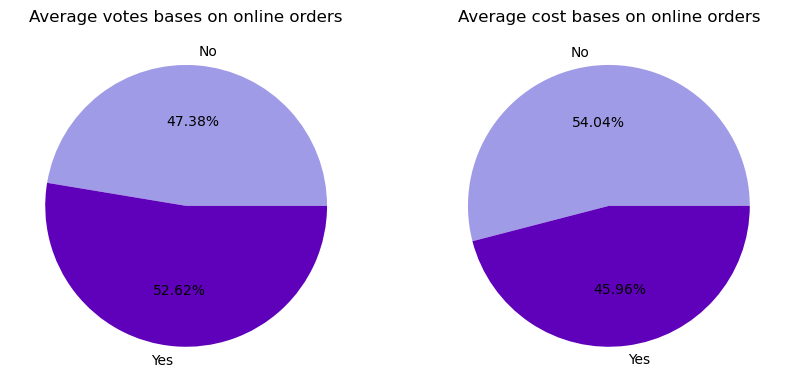

In [52]:
plt.figure(figsize=(10,9))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.pie(average_votes_and_cost['votes'], labels=['No','Yes'], autopct='%1.2f%%',colors=['#A09BE7', '#5F00BA'])
ax2.pie(average_votes_and_cost['approx_cost(for two people)'], labels=['No','Yes'], autopct='%1.2f%%',colors=['#A09BE7', '#5F00BA'])
ax1.set_title("Average votes bases on online orders")
ax2.set_title('Average cost bases on online orders')
plt.show()

**What are the best cuisines in each restraunt by rating?**

**INSIGHTS: It makes it easy to know highest rated cuisins in each restraunt to know the best each one offer**

In [53]:
best_cuisines = unique_data.groupby(['name','cuisines'])[['rate']].max().sort_values(by='rate',ascending=False)
best_cuisines

,,rate
name,cuisines,
Punjab Grill,North Indian,4.9
Sant Spa Cuisine,"Healthy Food, Salad, Mediterranean",4.9
ABs Absolute Barbecues,"European, Mediterranean, North Indian, BBQ",4.9
Byg Brewski Brewing Company,"Continental, North Indian, Italian, South Indian, Finger Food",4.9
Asia Kitchen By Mainland China,"Asian, Chinese, Thai, Momos",4.9
...,...,...
Bageecha,"North Indian, Chinese",2.2
Mamma Mexicana,Mexican,2.2
Deckers Lane,Bengali,2.1


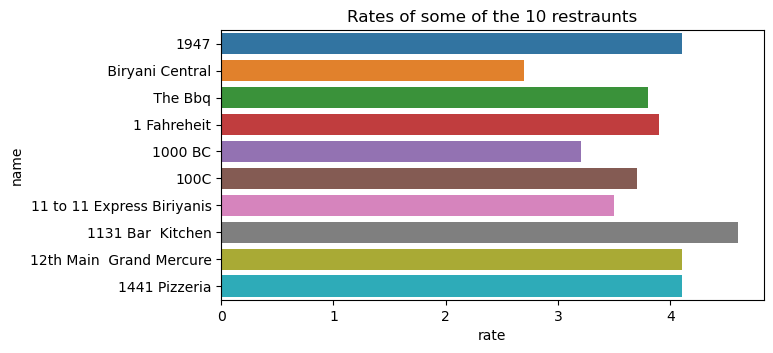

In [111]:
plt.figure(figsize=(7, 3.5))
best_cuisines_grouped = best_cuisines.groupby('name')['rate'].max().reset_index()
sns.barplot(x='rate', y='name', data=best_cuisines_grouped.head(10))
plt.title('Rates of some of the 10 restraunts')
plt.show()

**What is average cost of biryani by location?**

**INSIGHTS: Average cost of biryani in all restraunt helps us choose the best option suited for our budget**

In [112]:
avg_biryani = unique_data[unique_data['cuisines'] == 'Biryani'].groupby('location')[['approx_cost(for two people)']].mean().sort_values(by='approx_cost(for two people)',ascending=False)
avg_biryani

,approx_cost(for two people)
location,
Sahakara Nagar,650.000000
Residency Road,507.142857
Koramangala 8th Block,500.000000
Koramangala 4th Block,500.000000
East Bangalore,475.000000
...,...
Mysore Road,200.000000
Thippasandra,200.000000
Jayanagar,200.000000


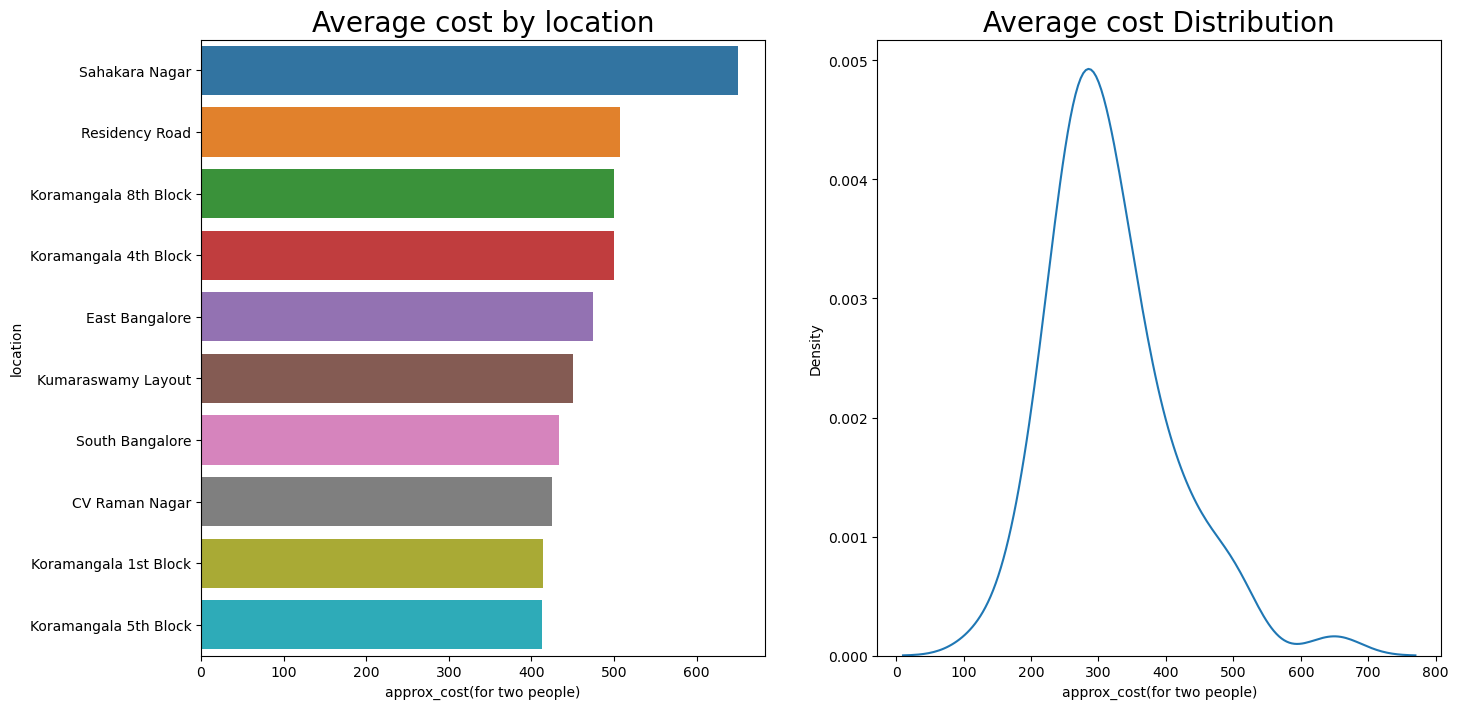

In [243]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x="approx_cost(for two people)", y="location", data=avg_biryani.head(10).reset_index(),ax=axes[0])
axes[0].set_title('Average cost by location', fontsize = 20)
sns.kdeplot(x='approx_cost(for two people)', data=avg_biryani, ax=axes[1])
axes[1].set_title('Average cost Distribution', fontsize = 20)
plt.show()

**Do the ratings of restraunt depends on the pricing?**

**INSIGHTS: As we can see the pricing for most rated and least rated restraunts are roughly the same hece ratings do not depends on the pricing**

In [121]:
rate_vs_price = unique_data.groupby('name').agg({'rate':'mean','approx_cost(for two people)':'mean'}).sort_values(by='rate',ascending=False)
rate_vs_price

,rate,approx_cost(for two people)
name,,
Sant Spa Cuisine,4.900000,1000.0
Asia Kitchen By Mainland China,4.900000,1500.0
Byg Brewski Brewing Company,4.900000,1600.0
Punjab Grill,4.871429,2000.0
Belgian Waffle Factory,4.852381,400.0
...,...,...
Mamma Mexicana,2.200000,1000.0
Bageecha,2.150000,650.0
Deckers Lane,2.100000,400.0


Text(0.5, 1.0, 'Cost of Cuisines(Worst rated)')

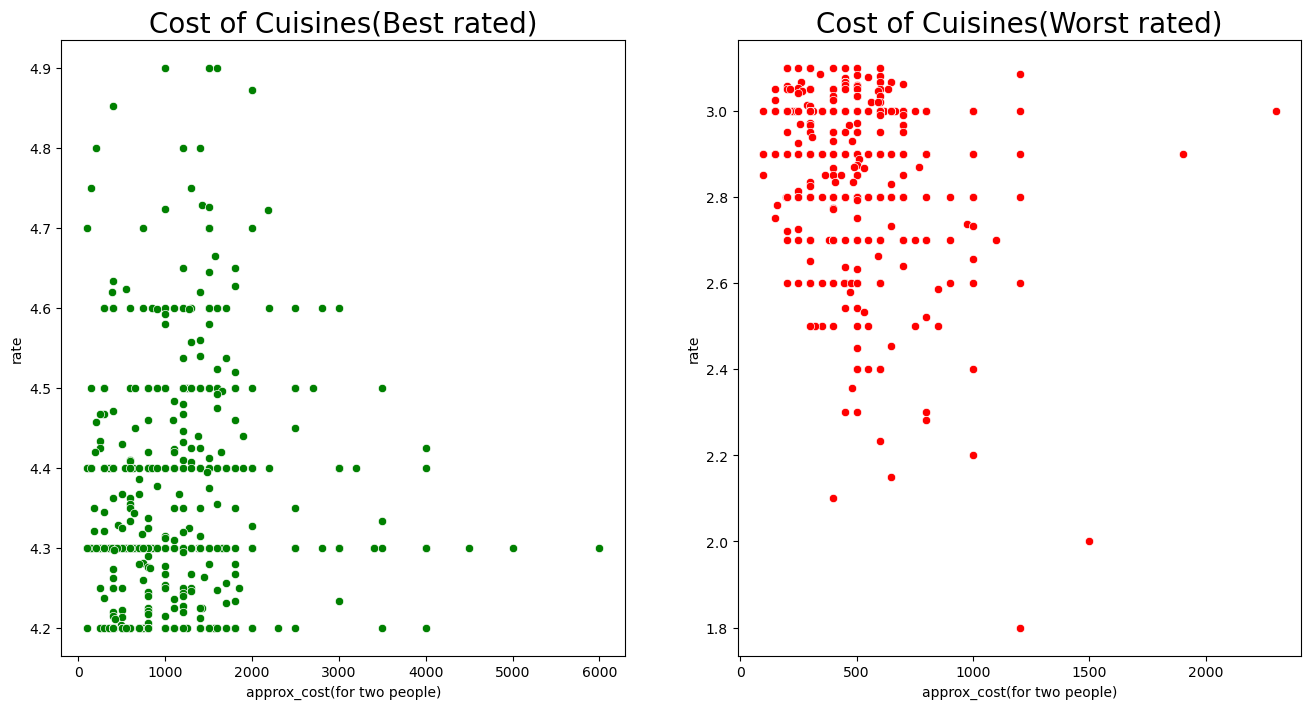

In [241]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=rate_vs_price.head(500), ax=axes[0], color='g')
axes[0].set_title('Cost of Cuisines(Best rated)', fontsize = 20)
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=rate_vs_price.tail(500), ax=axes[1],color='r')
axes[1].set_title('Cost of Cuisines(Worst rated)', fontsize = 20)

**Does the booking availability affects the popularity of restraunt?**

**INSIGHTS: It is clearly evident that restraunts providing booking facilities are significantly more popular.**

In [150]:
votes_vs_booking = unique_data.groupby('book_table')[['votes']].mean()
votes_vs_booking

,votes
book_table,
No,200.591845
Yes,1244.561281


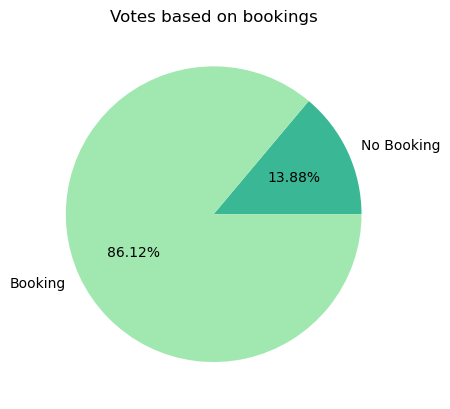

In [153]:
plt.pie(votes_vs_booking['votes'], labels=['No Booking','Booking'], autopct='%1.2f%%',colors=['#3AB795', '#A0E8AF'])
plt.title('Votes based on bookings')
plt.show()

**Show the delivery type restraunt with cost lower than 500 and rating above 4**

**INSIGHTS: We can see the most affordable restraunts of type delivery with best possible ratings. It also shows that Belgian Waffle Factory is dominating the best rated afordable restraunts.**

In [171]:
delivery_data_filtered = delivery_data[(delivery_data['rate'] >= 4.0) & (delivery_data['approx_cost(for two people)'] <= 500.0)]
delivery_data_filtered = delivery_data_filtered.sort_values(by='rate', ascending=False).head(10)
delivery_data_filtered

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
42381,Belgian Waffle Factory,Yes,No,4.9,1750,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery
14740,Belgian Waffle Factory,Yes,No,4.9,1743,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery
11745,Belgian Waffle Factory,Yes,No,4.9,1744,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery
5153,Belgian Waffle Factory,Yes,No,4.9,1746,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery
17877,Belgian Waffle Factory,Yes,No,4.9,1735,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery
37843,Belgian Waffle Factory,Yes,No,4.9,1749,Brigade Road,Dessert Parlor,"Coffee, Berryblast, Nachos, Chocolate Waffles,...",Desserts,400.0,Delivery
26821,Belgian Waffle Factory,Yes,No,4.8,187,Koramangala 5th Block,Dessert Parlor,"Nachos, Chocolate Waffles, Nutella Waffle, Sal...",Desserts,400.0,Delivery
46445,CTR,Yes,No,4.8,4421,Malleshwaram,Quick Bites,"Benne Masala Dosa, Filter Coffee, Chai, Butter...",South Indian,150.0,Delivery
39628,Belgian Waffle Factory,Yes,No,4.8,391,Vasanth Nagar,Dessert Parlor,"Chocolate Waffles, Nutella Waffle, Nachos, Fre...",Desserts,400.0,Delivery
29664,Belgian Waffle Factory,Yes,No,4.8,189,Koramangala 5th Block,Dessert Parlor,"Nachos, Chocolate Waffles, Nutella Waffle, Sal...",Desserts,400.0,Delivery


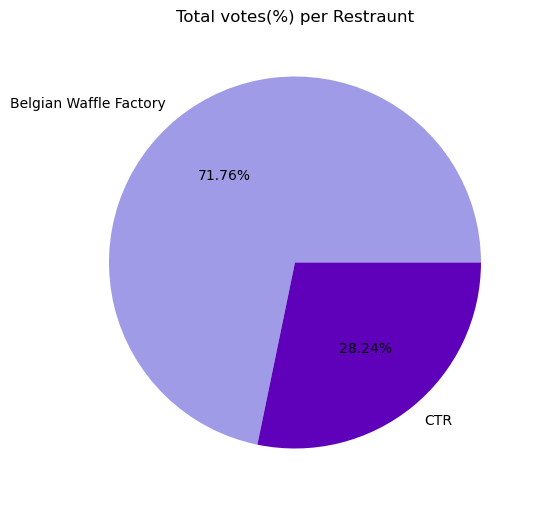

In [193]:
plt.figure(figsize=(6,8))
plt.pie(delivery_data_filtered.groupby('name')['votes'].sum(), labels=['Belgian Waffle Factory','CTR'], autopct='%1.2f%%', colors=['#A09BE7', '#5F00BA'])
plt.title('Total votes(%) per Restraunt')
plt.show()

**Restraunt branches count by location**

**INSIGHTS: We get to know the spread of each restraunt in different locations as well as count in that particular location**

In [218]:
rest_count = unique_data.groupby(['name','location']).agg({'location':'count'})
rest_count = rest_count.rename(columns={'location': 'location_count'})
rest_count

location_count
name                                       location                         
1947                                       Banashankari                    2
                                           Jayanagar                       6
                                           Malleshwaram                    3
                                           Rajajinagar                     3
 Biryani Central                           Marathahalli                    3
...                                                                      ...
nutree                                     Whitefield                      4
recess  Hilton Bangalore Embassy GolfLinks Domlur                          2
refuel                                     Bannerghatta Road               3
repEAT Hub                                 Marathahalli                    2
sCoolMeal                                  BTM                             1

[12114 rows x 1 columns]

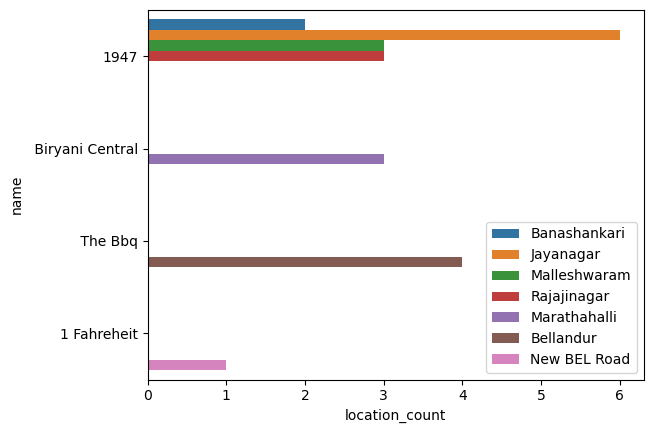

In [230]:
sns.barplot(x='location_count', y='name', data=rest_count.head(7).reset_index(), hue='location')
plt.legend(loc='lower right')
plt.show()

**Show all Biryani cuisines located in Whitefield with over 3.8 rating**

**INSIGHTS: Best rated biryani cuisines in whitefield have good pricing and all of them provide online orders**

In [286]:
location_WF = unique_data[unique_data['location'] == 'Whitefield']
biryani = location_WF[(location_WF['cuisines'] == 'Biryani') & (location_WF['rate'] >= 3.8)]
biryani

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
7052,Behrouz Biryani,Yes,No,3.9,167,Whitefield,Delivery,"Raita, Gulab Jamun, Basmati Rice, Gosht Dum Bi...",Biryani,650.0,Delivery
7119,Biryani Kitchen,Yes,No,4.3,627,Whitefield,Food Court,"Chicken Boneless Biryani, Hyderabadi Dum Birya...",Biryani,450.0,Delivery
7925,Biryani Kitchen,Yes,No,4.3,627,Whitefield,Food Court,"Chicken Boneless Biryani, Hyderabadi Dum Birya...",Biryani,450.0,Dine-out
50199,Behrouz Biryani,Yes,No,4.0,183,Whitefield,Delivery,"Raita, Gulab Jamun, Basmati Rice, Gosht Dum Bi...",Biryani,650.0,Delivery
50243,Biryani Kitchen,Yes,No,4.3,634,Whitefield,Food Court,"Chicken Boneless Biryani, Hyderabadi Dum Birya...",Biryani,450.0,Delivery
50297,Kolkata Biryani Center,Yes,No,3.8,40,Whitefield,Quick Bites,No Info,Biryani,250.0,Delivery
51312,Biryani Kitchen,Yes,No,4.3,634,Whitefield,Food Court,"Chicken Boneless Biryani, Hyderabadi Dum Birya...",Biryani,450.0,Dine-out
51348,Kolkata Biryani Center,Yes,No,3.8,40,Whitefield,Quick Bites,No Info,Biryani,250.0,Dine-out


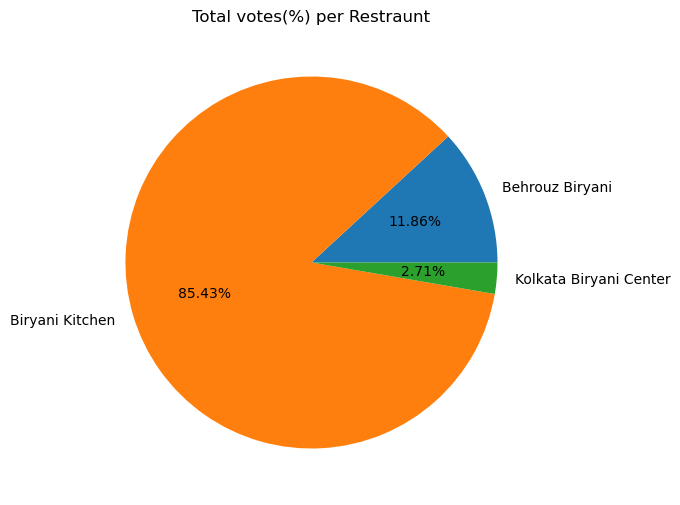

In [287]:
plt.figure(figsize=(6,8))
plt.pie(biryani.groupby('name')['votes'].sum(), labels=['Behrouz Biryani','Biryani Kitchen', 'Kolkata Biryani Center'], autopct='%1.2f%%')
plt.title('Total votes(%) per Restraunt')
plt.show()